### Note book for optimising delta_r

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from optimizer import optimize_delta_r, optimize_step_size
from scipy.optimize import minimize_scalar, minimize
from physics.constants import m_earth_SI, m_moon_SI, d_earth_moon_SI

Optimal delta_r: 64520.112511047984 km
(23573,)
1.0486155527864045


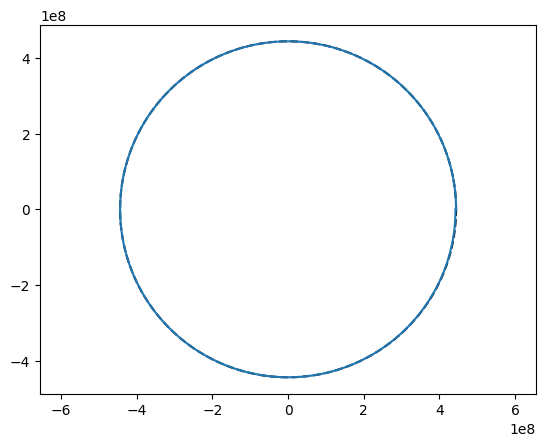

In [2]:
res = minimize_scalar(optimize_delta_r, bounds=(1.0486154, 1.0486158), method='bounded')
print(res.x)

In [3]:
base_L2 = d_earth_moon_SI * (m_moon_SI/(3*m_earth_SI))**(1/3)
#print(f'Optimal delta_r {base_L2*res.x*1e-3} km')
#print(o)
delta_rs = np.linspace(1, 1.1, 50) * base_L2


Optimal delta_r: 61528.85329576098 km
(23573,)
Optimal delta_r: 61654.42238411967 km
(23573,)
Optimal delta_r: 61779.99147247837 km
(23573,)
Optimal delta_r: 61905.560560837075 km
(23573,)
Optimal delta_r: 62031.12964919577 km
(23573,)
Optimal delta_r: 62156.69873755445 km
(23573,)
Optimal delta_r: 62282.26782591315 km
(23573,)
Optimal delta_r: 62407.836914271844 km
(23573,)
Optimal delta_r: 62533.406002630545 km
(23573,)
Optimal delta_r: 62658.97509098924 km
(23573,)
Optimal delta_r: 62784.54417934794 km
(23573,)
Optimal delta_r: 62910.113267706634 km
(23573,)
Optimal delta_r: 63035.682356065336 km
(23573,)
Optimal delta_r: 63161.25144442403 km
(23573,)
Optimal delta_r: 63286.82053278273 km
(23573,)
Optimal delta_r: 63412.38962114141 km
(23573,)
Optimal delta_r: 63537.95870950011 km
(23573,)
Optimal delta_r: 63663.527797858806 km
(23573,)
Optimal delta_r: 63789.09688621751 km
(23573,)
Optimal delta_r: 63914.6659745762 km
(23573,)
Optimal delta_r: 64040.2350629349 km
(23573,)
Optimal d

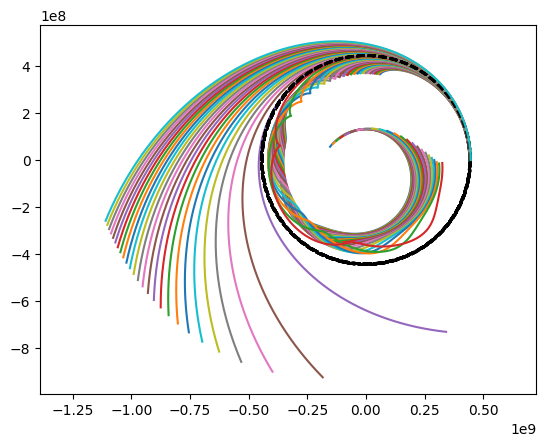

In [4]:
errors = []
for delta_r in delta_rs:
    ratio = delta_r / base_L2
    errors.append(optimize_delta_r(ratio))

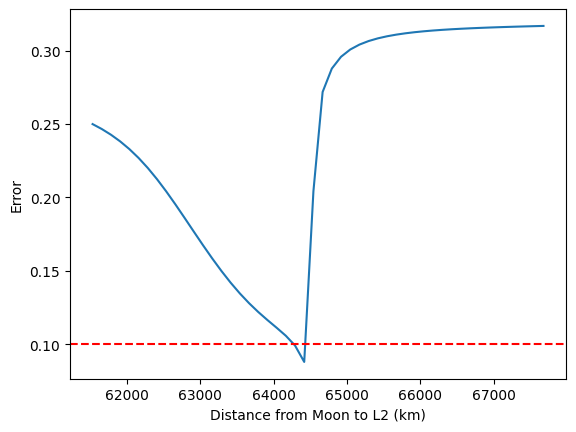

In [ ]:
plt.plot(delta_rs*1e-3, errors)
plt.axhline(y=0.01, color='r', linestyle='dashed', label='Minimum Error')
plt.xlabel('Distance from Moon to L2 (km)')
plt.ylabel('Error')
plt.show()

In [6]:
res2 = minimize_scalar(optimize_step_size, bounds=(1e-1, 1e5), method='bounded')
optimal_step_size = res2.x
print(f'Optimal step size {optimal_step_size} s')

TypeError: optimize_step_size() missing 1 required positional argument: 'meth'

In [7]:
step_sizes = np.logspace(0, 5, 6)
print(step_sizes)

[1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [8]:
errors2 = []
methods = ['Taylor', 'RK4','RK8']
for i,method in enumerate(methods):
    errors2.append([])
    for step_size in step_sizes:
        error2 = optimize_step_size(step_size, method)
        errors2[i].append(error2)

Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km
Optimal delta_r: 64520.112511047984 km


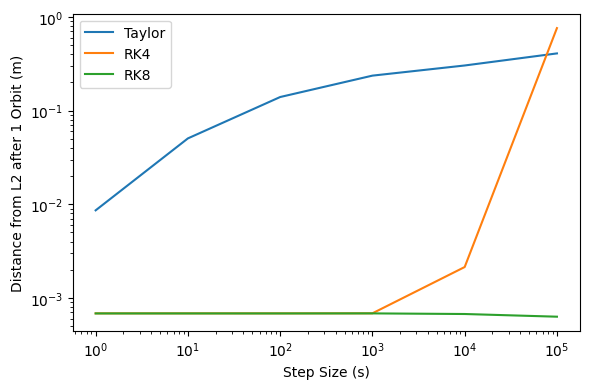

In [11]:
optimal_step_size_index = np.argmin(errors2)
taylor = errors2[0]
rk4 = errors2[1]
rk8 = errors2[2]
plt.figure(figsize=(6,4))
plt.plot(step_sizes, taylor, label='Taylor')
plt.plot(step_sizes, rk4, label='RK4')
plt.plot(step_sizes, rk8, label='RK8')
#plt.plot(optimal_step_size,
#         optimize_step_size(optimal_step_size),
#         'ro', label='Optimal Step Size')
#print(f'Optimal step size: {optimal_step_size} s with error {optimize_step_size(optimal_step_size)}')

plt.xlabel('Step Size (s)')
plt.ylabel('Distance from L2 after 1 Orbit (m)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()
